In [90]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as cls
import numpy as np
import scipy.io

In [57]:
# load file
# "World Ocean Atlas" dataset from NOAA
#f = open("WOA13_AnnualMean.mat")
f = scipy.io.loadmat("WOA13_AnnualMean.mat")
f

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Mar 14 01:16:32 2016',
 '__version__': '1.0',
 '__globals__': [],
 's_an': array([[[9.9692100e+36, 9.9692100e+36, 9.9692100e+36, ...,
          9.9692100e+36, 9.9692100e+36, 9.9692100e+36],
         [9.9692100e+36, 9.9692100e+36, 9.9692100e+36, ...,
          9.9692100e+36, 9.9692100e+36, 9.9692100e+36],
         [9.9692100e+36, 9.9692100e+36, 9.9692100e+36, ...,
          9.9692100e+36, 9.9692100e+36, 9.9692100e+36],
         ...,
         [3.1018410e+01, 3.1148809e+01, 3.1533091e+01, ...,
          9.9692100e+36, 9.9692100e+36, 9.9692100e+36],
         [3.1209190e+01, 3.1340891e+01, 3.1734409e+01, ...,
          9.9692100e+36, 9.9692100e+36, 9.9692100e+36],
         [3.1402891e+01, 3.1525499e+01, 3.1924400e+01, ...,
          9.9692100e+36, 9.9692100e+36, 9.9692100e+36]],
 
        [[9.9692100e+36, 9.9692100e+36, 9.9692100e+36, ...,
          9.9692100e+36, 9.9692100e+36, 9.9692100e+36],
         [9.9692100e+36,

In [155]:
# coordinate vector -> coordinate matrix
lon, lat = np.meshgrid(f["lon"], f["lat"])
LON, DEP = np.meshgrid(f["lon"], f["depth"])
LAT, dep = np.meshgrid(f["lat"], f["depth"])

In [303]:
# select 2D data for plot
surfaceT = f["t_an"][:, :, 0].transpose()
surfaceT[surfaceT > 100] = np.nan #clean data
surfaceT

zonalT = f["t_an"][:, 130, :].transpose() #40.5 N (a little north to Champaign)
zonalT[zonalT > 100] = np.nan #clean data
zonalT

meridT = f["t_an"][91, :, :].transpose() #88.5 W (a little west to Champaign)
meridT[meridT > 100] = np.nan #clean data
meridT

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


array([[     nan,      nan,      nan, ..., -1.56421, -1.57551, -1.57421],
       [     nan,      nan,      nan, ..., -1.61521, -1.64451, -1.65361],
       [     nan,      nan,      nan, ..., -1.67331, -1.69351, -1.71361],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)

In [281]:
# the following function is referenced from "https://matplotlib.org/users/colormapnorms.html"
# in order to set the color of the colorbar to a certain defined value (0)
class midPoint(cls.Normalize):
    def __init__(self, vmin = None, vmax = None, midpoint = None, clip = False):
        self.midpoint = midpoint
        cls.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip = None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Visualization I

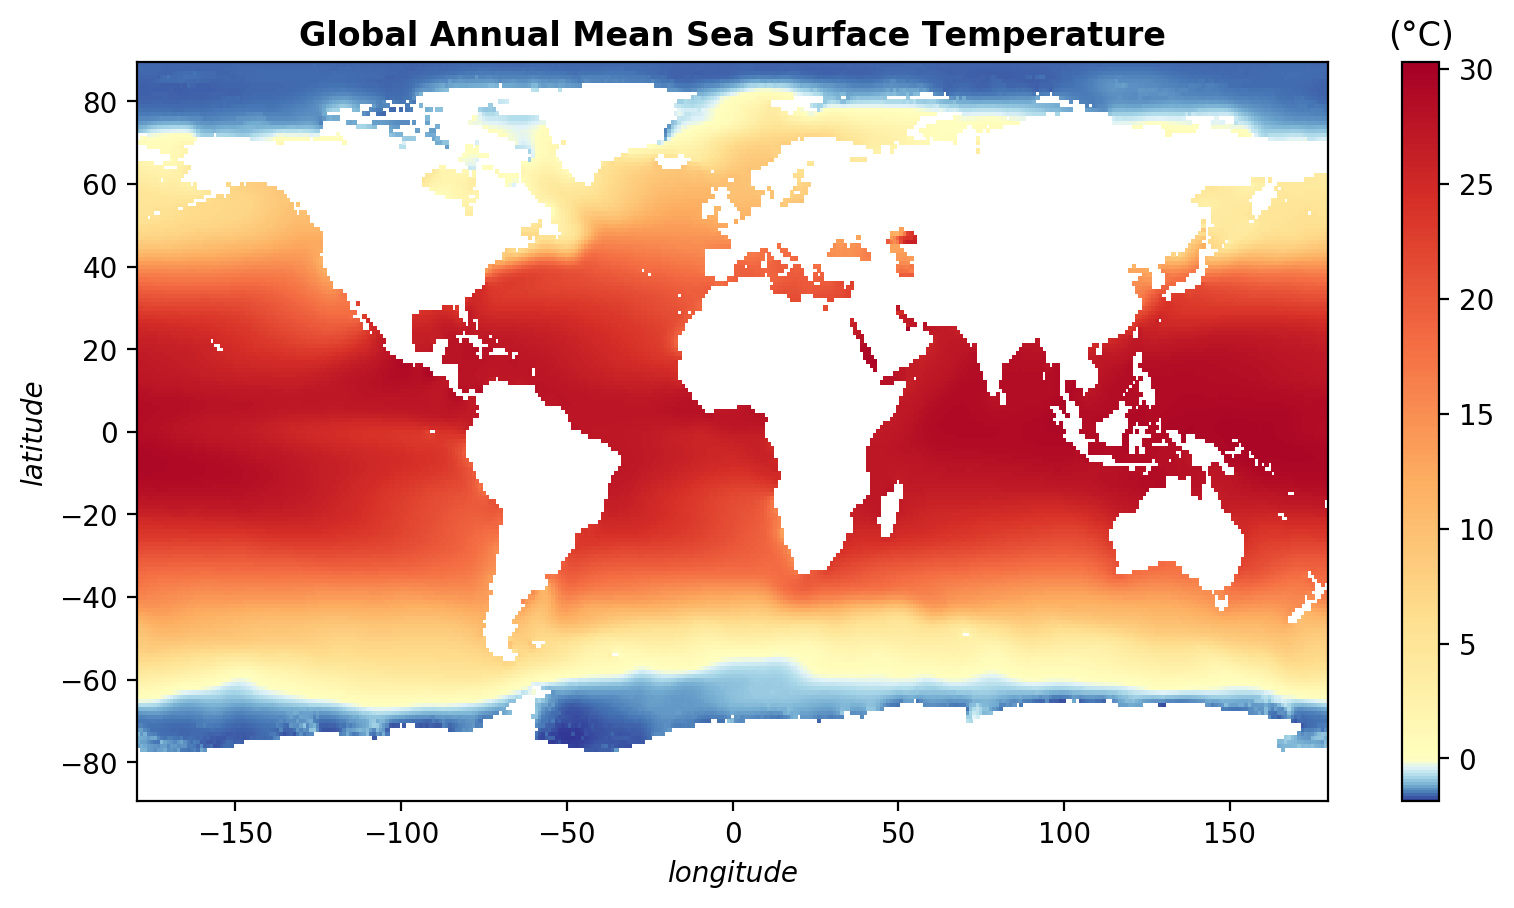

In [330]:
plt.figure(figsize = [9.6, 4.8], dpi = 200)
#plt.imshow(surfaceT, cmap = 'RdYlBu_r', interpolation = 'bicubic')
#plt.contourf(lon, lat, surfaceT, norm = midPoint(midpoint = 0.), cmap = 'RdYlBu_r')
#plt.pcolormesh(lon, lat, x, cmap = 'RdYlBu_r', norm = midPoint(midpoint = 0.), shading = 'gouraud').cmap.set_bad('white')
plt.pcolor(lon, lat, surfaceT, cmap = 'RdYlBu_r', norm = midPoint(midpoint = 0.))


#plt.gca().invert_yaxis()
plt.title("Global Annual Mean Sea Surface Temperature", fontweight = 'bold')
plt.xlabel("longitude", fontstyle = 'italic')
plt.ylabel("latitude", fontstyle = 'italic')
plt.colorbar().ax.set_title("(\N{DEGREE SIGN}C)") #place the unit on top of the colorbar

plt.savefig("avgT_global.png")

### Description

- Pros: We could easily tell from the visualization that temperature over 0 degree celsius are in warm color whereas temperature with negative values are in the color blue and that the higher the temperature is, the warmer the color is. We could get an overview of the global sea surface temperature within a glance.

- Cons: Since the visualization is in a global view, it is harder to observe the temperature difference within a smaller region under the circumstances. Also, due to the gradient of the color map, it might be difficult to distinguish which temperature interval a certain area lies in.

I tried to use the imshow() function at first. However, since the amount of data aren't big enough to fill the global profile, the visualization would be pixelated. Plus, the x-tick and y-tick labels do not accord to the correct geographic coordinates. Then I decided to use contourf() instead to smooth the boundaries. Besides, I get to assign the data values to their exact geographic coordinate so the x-ticks and y-ticks could be displayed properly rather than showing 0~180 and 0~360. However, I realized that contourf() works in a way by splitting the temperature into arithmetic intervals which are assigned to single colors instead of gradient ones. Then I move on to pcolormesh() only to find that it does not support masked arrays. Finally, I tried using pcolor() and it worked perfectly.

## Visualization II

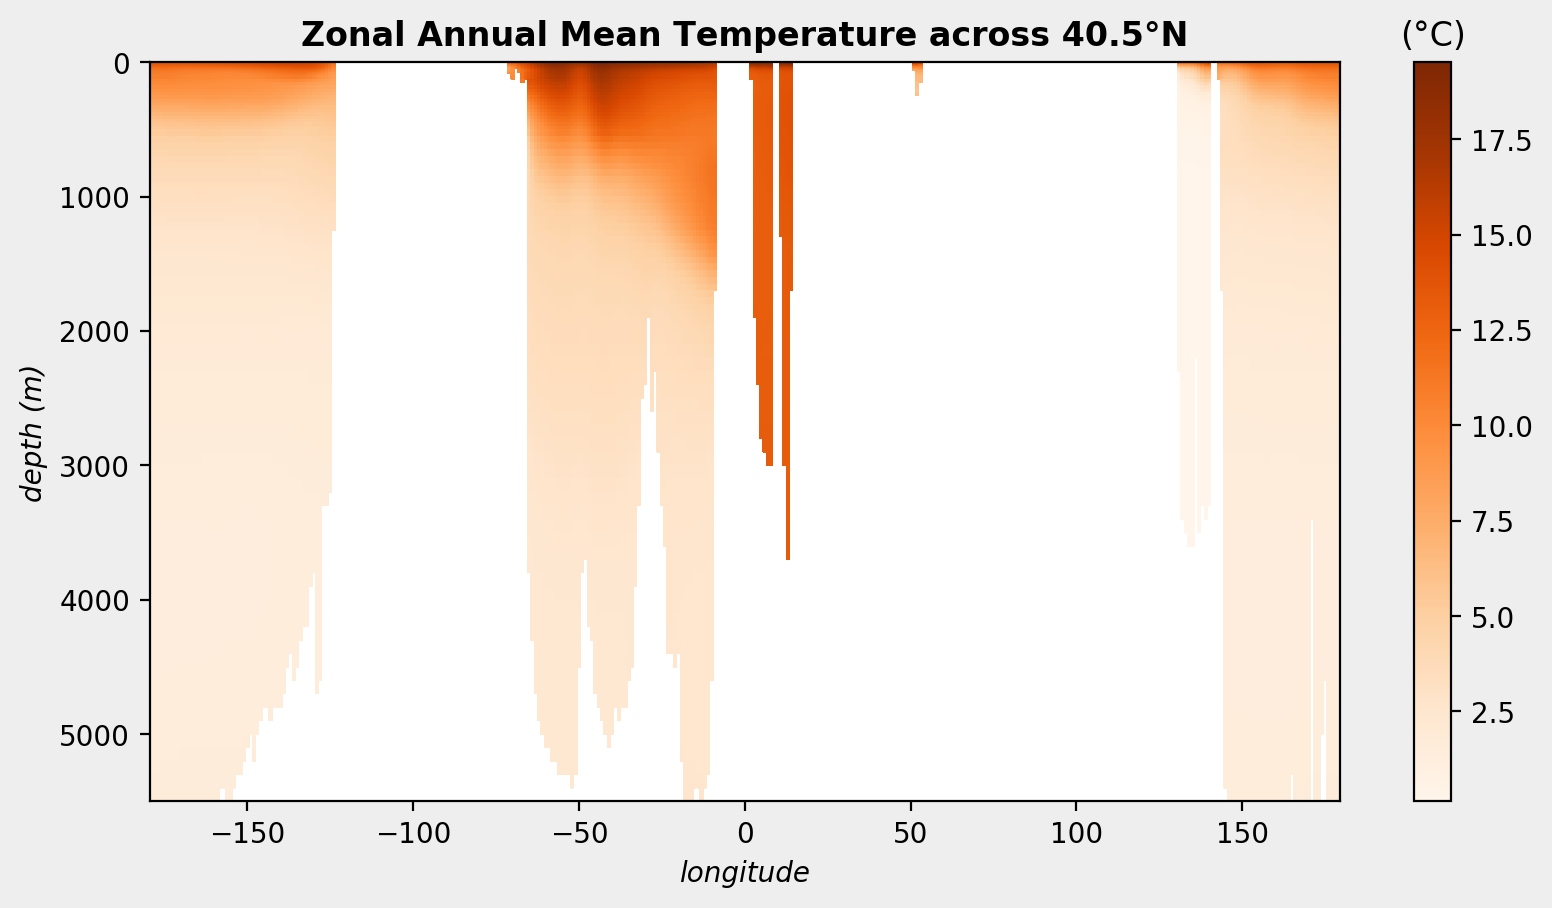

In [342]:
plt.figure(figsize = [9.6, 4.8], dpi = 200, facecolor = '#EEEEEE')
plt.style.use('default')
plt.pcolor(LON, DEP, zonalT, cmap = 'Oranges')
#plt.contourf(LON, DEP, zonalT, cmap = 'Oranges')

plt.gca().invert_yaxis()
plt.title("Zonal Annual Mean Temperature across 40.5\N{DEGREE SIGN}N", fontweight = 'bold')
plt.xlabel("longitude", fontstyle = 'italic')
plt.ylabel("depth (m)", fontstyle = 'italic')
plt.colorbar().ax.set_title("(\N{DEGREE SIGN}C)")

plt.savefig("avgT_zonal.png")

### Description

- Pros: We could get an overview of the zonal temperature of the hydrographic section approximately accross Champaign with a glance. We could observe from the visualization clearly that the higher the temperature is, the warmer and darker the shading is.

- Cons: Since the area where temperature has more obvious differences are mostly concentrated near the surface area, it is harder to observe those area without zooming in.

## Visualization III

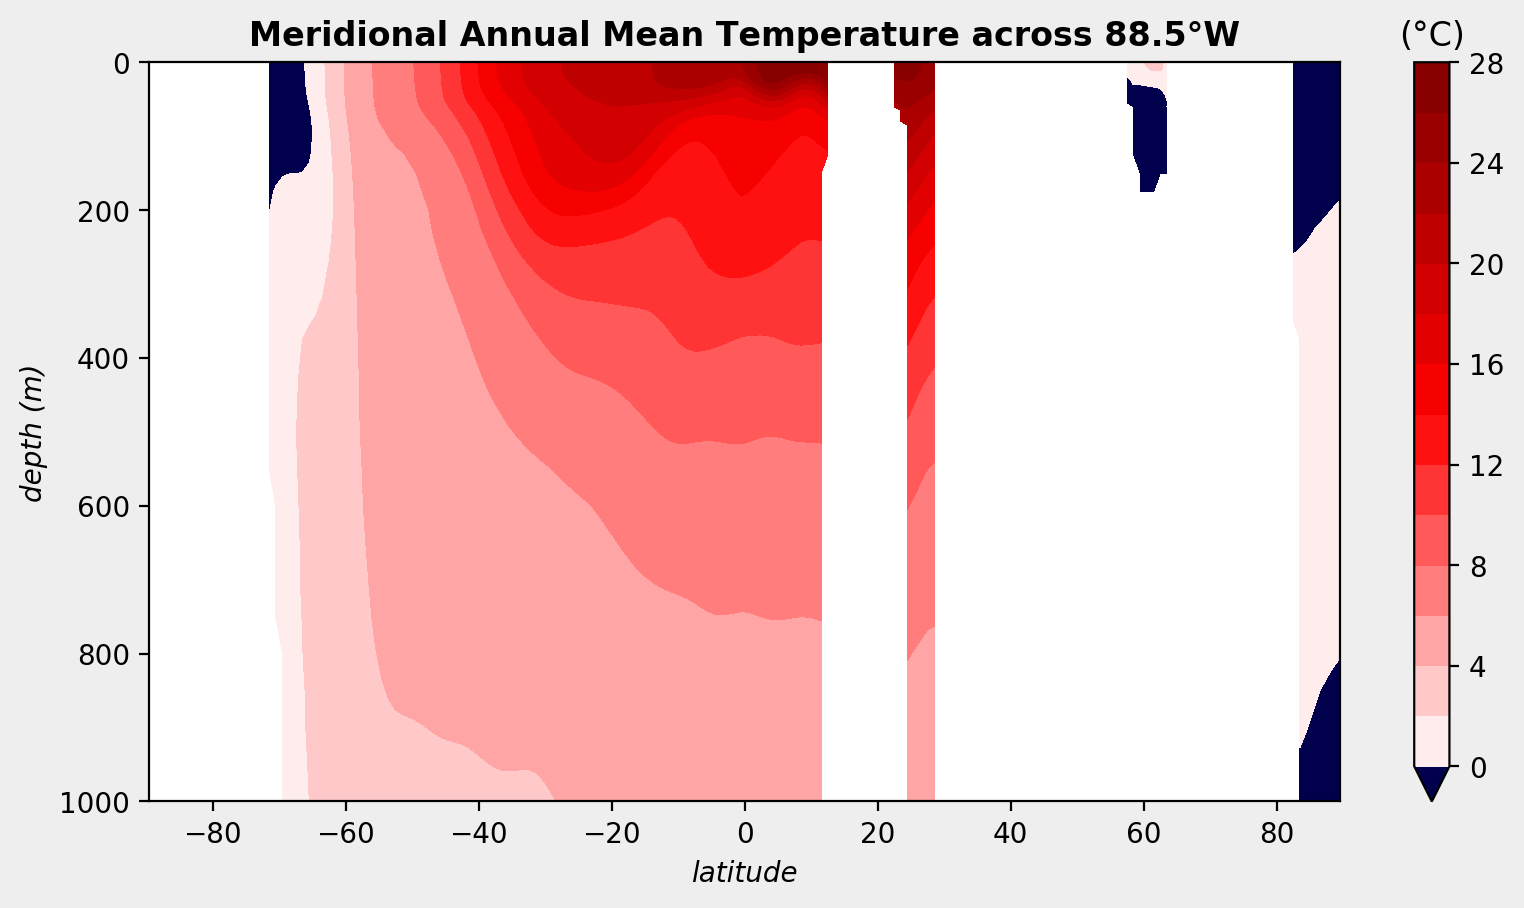

In [340]:
plt.figure(figsize = [9.6, 4.8], dpi = 200, facecolor = '#EEEEEE')
#plt.pcolor(LAT, dep, meridT, norm = midPoint(midpoint = 0.), cmap = 'seismic', vmin = 0)
plt.contourf(LAT, dep, meridT, 14, norm = midPoint(midpoint = 0.), cmap = 'seismic', vmin = 0, extend = 'min')

plt.ylim((0, 1000))
plt.gca().invert_yaxis()
#plt.yticks(np.arange(-1000, 1, 100))
plt.title("Meridional Annual Mean Temperature across 88.5\N{DEGREE SIGN}W", fontweight = 'bold')
plt.xlabel("latitude", fontstyle = 'italic')
plt.ylabel("depth (m)", fontstyle = 'italic')
plt.colorbar().ax.set_title("(\N{DEGREE SIGN}C)")

plt.savefig("avgT_meridional.png")

### Description

- Pros: By choosing the range closer to the ocean surface, we get to have a closer look to how the annual mean temperature varies. We are also capable of actually knowing the temperature range each color corresponds to.
- Cons: We don't get to see the visualization with gradient colors.

I used contouf() instead of pcolor() here hoping to see the annual mean temperature in layers. I'm just trying to observe the dataset with a different angle.